# **Machine Learning Project - Ames Housing Data Analysis - Part 1**

*Nimit Sharma*


<img src='https://www.ryanhomes.com/images/ryan/Ryan-Homepage-Hero-Images-1.jpg'/>

## **1.Introduction**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import scipy.stats as stats
import shap

##### **Import dataset**

In [3]:
ames_df = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)
pd.set_option('display.max_columns', 20)
ames_df.head()


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
ames_df.shape

(2580, 81)

In [5]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [6]:
ames_df.YrSold.value_counts().sort_index(ascending = True)

2006    516
2007    600
2008    564
2009    585
2010    315
Name: YrSold, dtype: int64

<span style="color:red">
The values could be predicted by HPI by zip?
</span> 

In [7]:
print(ames_df.SalePrice.min())
print(ames_df.SalePrice.max())

12789
755000


In [8]:
ames_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2580.0,7.148300e+08,1.886626e+08,526301100.0,5.313630e+08,535454605.0,907181092.5,1.007100e+09
GrLivArea,2580.0,1.486040e+03,4.886502e+02,334.0,1.112000e+03,1436.0,1733.0,4.676000e+03
SalePrice,2580.0,1.780596e+05,7.503109e+04,12789.0,1.299750e+05,159900.0,209625.0,7.550000e+05
MSSubClass,2580.0,5.769186e+01,4.280210e+01,20.0,2.000000e+01,50.0,70.0,1.900000e+02
LotFrontage,2118.0,6.851605e+01,2.283583e+01,21.0,5.700000e+01,68.0,80.0,3.130000e+02
LotArea,2580.0,1.012015e+04,8.126938e+03,1300.0,7.406750e+03,9391.0,11494.0,2.152450e+05
OverallQual,2580.0,6.046124e+00,1.367590e+00,1.0,5.000000e+00,6.0,7.0,1.000000e+01
OverallCond,2580.0,5.618605e+00,1.122008e+00,1.0,5.000000e+00,5.0,6.0,9.000000e+00
YearBuilt,2580.0,1.970314e+03,2.971970e+01,1872.0,1.953000e+03,1972.0,1999.0,2.010000e+03
YearRemodAdd,2580.0,1.983752e+03,2.049024e+01,1950.0,1.965000e+03,1992.0,2003.0,2.010000e+03


## **2.Exploratory Data Analysis**

##### **Which of the house styles, ranch or colonial, is more popular in terms of the house prices?**

In [9]:
ames_df.HouseStyle.value_counts()

1Story    1288
2Story     773
1.5Fin     284
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: HouseStyle, dtype: int64

[Text(0.5, 1.0, 'House Style Count')]

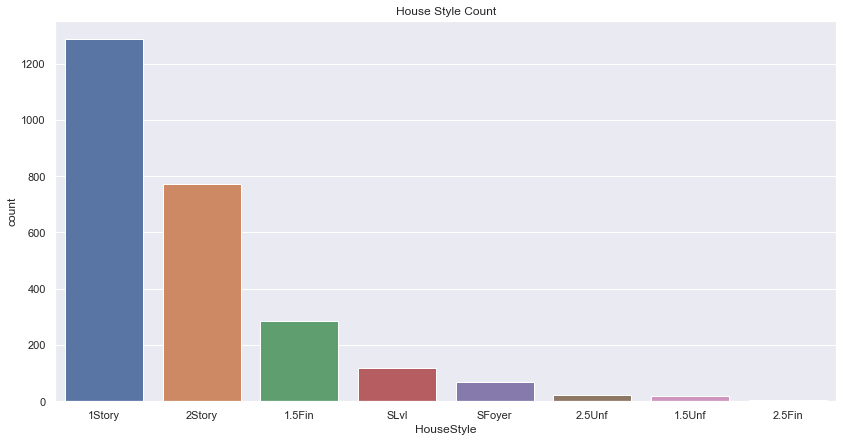

In [10]:
# 1Story houses are more popular compared to other inventory
sns.set(rc = {'figure.figsize':(14,7)})
sns.countplot(data=ames_df, 
              x = 'HouseStyle', 
              order=ames_df['HouseStyle'].value_counts().index).set(title = "House Style Count")

[Text(0.5, 1.0, 'House Style Boxplot')]

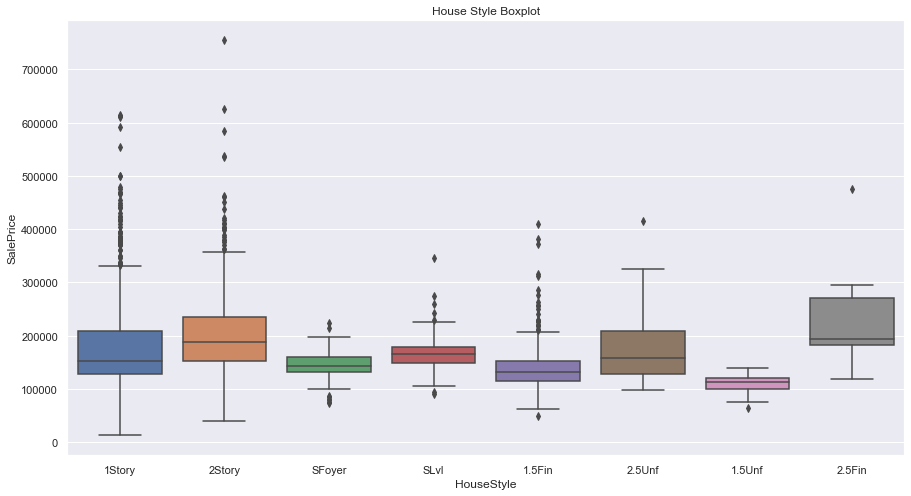

In [11]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='HouseStyle', y='SalePrice', data=ames_df).set(title = "House Style Boxplot")

<b> 
- *Single Story Houses are the largest set but 2 story houses are likely more expensive *
- *1Story	One story* 
- *1.5Fin	One and one-half story: 2nd level finished*
- *1.5Unf	One and one-half story: 2nd level unfinished*
- *2Story	Two story*
- *2.5Fin	Two and one-half story: 2nd level finished*
- *2.5Unf	Two and one-half story: 2nd level unfinished*
- *SFoyer	Split Foyer*
- *SLvl	  Split Level*
</b>

In [12]:
# on average, the 2-story houses are $25,524 more expensive than 1-story houses 

house_styles = round(ames_df.groupby(["HouseStyle"])["SalePrice"].agg('mean'))
print("Average Ranch Price: $", round(house_styles['1Story']))
print("Average Colonial Price: $", round(house_styles['2Story']))
print("Difference in Prices: $", round(house_styles['2Story']) - round(house_styles['1Story']))

Average Ranch Price: $ 175868
Average Colonial Price: $ 201392
Difference in Prices: $ 25524


[Text(0.5, 1.0, 'The House Price per Square Footage')]

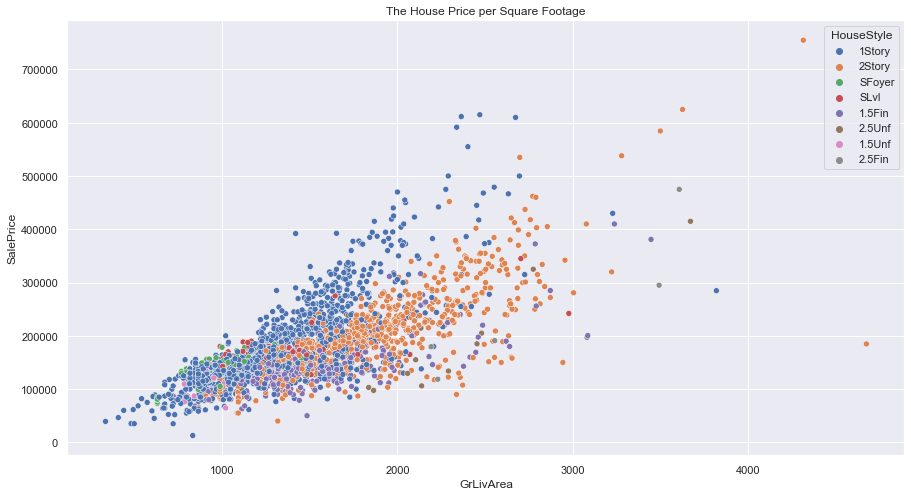

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = ames_df, 
                x = 'GrLivArea',  
                y = 'SalePrice', 
                hue = 'HouseStyle').set(title = "The House Price per Square Footage")

[Text(0.5, 1.0, 'The House Price per Lot Area')]

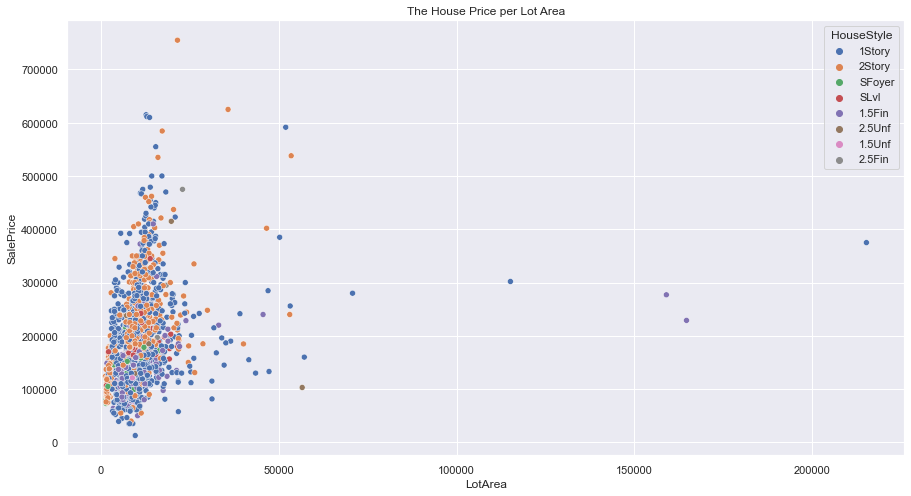

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = ames_df, 
                x = 'LotArea',  
                y = 'SalePrice', 
                hue = 'HouseStyle').set(title = "The House Price per Lot Area")

In [15]:
ames_df.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

Text(0.5, 1.0, 'Means of prices comparasion')

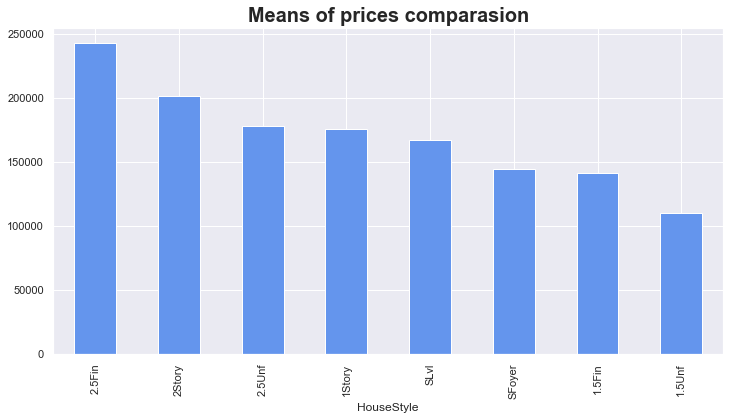

In [16]:
plt.figure(figsize = (12,6))
ames_df.groupby('HouseStyle')['SalePrice'].mean().sort_values(ascending=False).plot.bar(color = '#6495ED')
plt.title('Means of prices comparasion', fontweight="bold", size=20)

In [17]:
one_story = ames_df[ames_df['HouseStyle'] == '1Story']
two_story = ames_df[ames_df['HouseStyle'] == '2Story']

In [18]:
one_story_array = one_story['SalePrice'].to_numpy()
two_story_array = two_story['SalePrice'].to_numpy()

In [19]:
stats.ttest_ind(one_story_array, two_story_array)

Ttest_indResult(statistic=-7.215715102864267, pvalue=7.50831569536639e-13)

### Reject the null

#####**Is the house price sensitive to 2ndFlrSF (1st story excluded) and vice versa?**

[Text(0.5, 1.0, 'The House Price Sensitivity')]

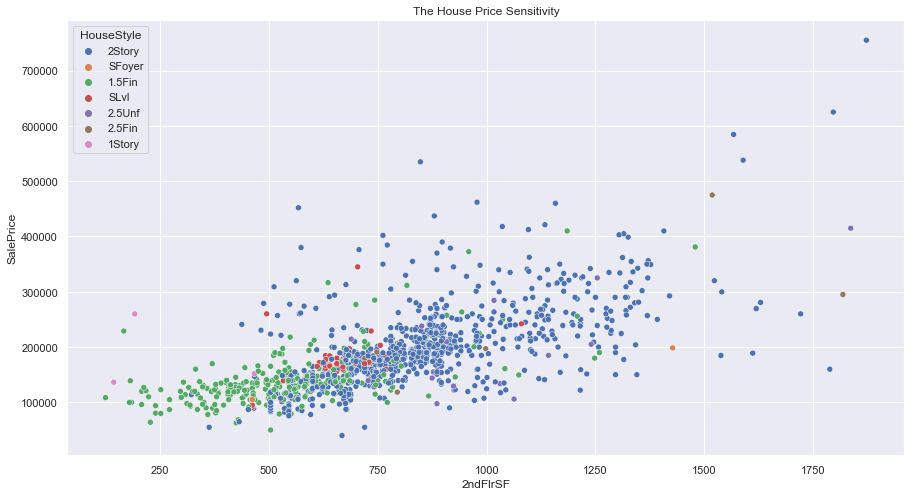

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = ames_df[ames_df['2ndFlrSF']!= 0], 
                x = '2ndFlrSF',  
                y = 'SalePrice', 
                hue = 'HouseStyle').set(title = "The House Price Sensitivity")

[Text(0.5, 1.0, 'The House Price Sensitivity')]

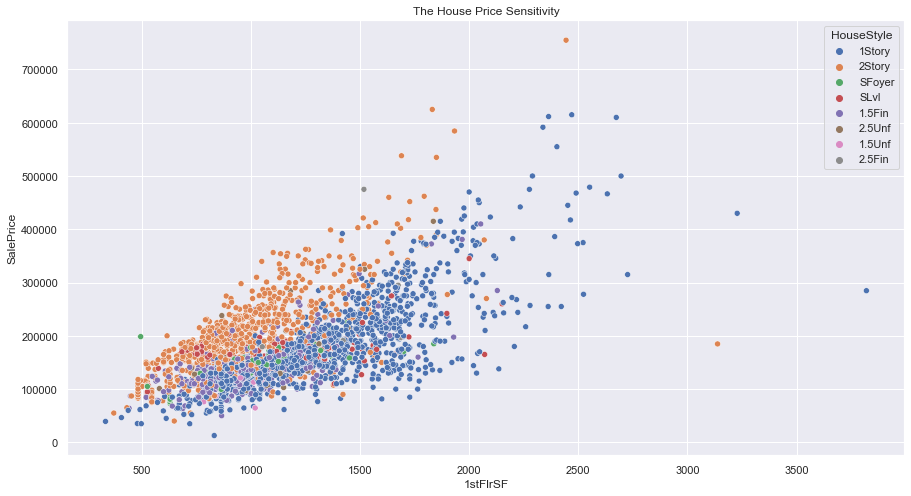

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = ames_df[ames_df['1stFlrSF']!= 0], 
                x = '1stFlrSF',  
                y = 'SalePrice', 
                hue = 'HouseStyle').set(title = "The House Price Sensitivity")

##### **How is GrLivArea engineered from the other area-related feature? If you would design a gross area feature (to replace GrLivArea) for the purpose of descriptive modeling, what would you do? What are the pros and cons when aggregating several features together?**

In [22]:
size_related = ames_df.filter(regex='SF$|Area$')
size_related.isnull().sum(axis=0)

GrLivArea        0
LotArea          0
MasVnrArea      14
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
dtype: int64

In [23]:
size_related = size_related.fillna(0.0)

In [24]:
size_related.isnull().sum(axis=0)

GrLivArea       0
LotArea         0
MasVnrArea      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
PoolArea        0
dtype: int64

In [25]:
# GrLivArea = 1stFlrSF + 2stFlrSF + FinishBsmtSF - find total interior livable area
# FinishBsmtSF = TotalBsmtSF - BsmtUnfSF - find finished basement SF 

size_related['FinishBsmtSF'] = size_related['TotalBsmtSF'] - size_related['BsmtUnfSF']
size_related['TotLivArea'] = size_related['1stFlrSF'] + size_related['2ndFlrSF'] + size_related['FinishBsmtSF']
size_related = size_related.drop(['GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF'], axis =1)

In [26]:
size_related.columns

Index(['LotArea', 'MasVnrArea', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolArea', 'FinishBsmtSF', 'TotLivArea'],
      dtype='object')

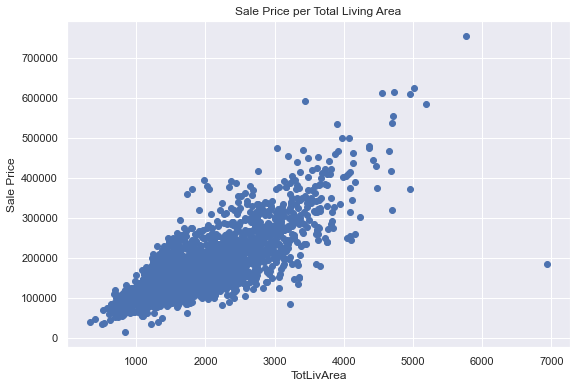

In [27]:
price = ames_df['SalePrice']
tot_liv_area = size_related['TotLivArea']

plt.figure(figsize=(9, 6))
plt.scatter(tot_liv_area, price)
plt.ylabel('Sale Price')
plt.xlabel('TotLivArea')
plt.title('Sale Price per Total Living Area')
plt.show()

In [28]:
lm = LinearRegression()
lm.fit(tot_liv_area.values.reshape(-1,1), price)
lm.score(tot_liv_area.values.reshape(-1,1), price)

0.6025310876692729

In [29]:
print(lm.coef_)
print(lm.intercept_)

[81.44254771]
16869.542960940365


In [30]:
lm.fit(np.log10(tot_liv_area.values.reshape(-1,1)), np.log10(price))
lm.score(np.log10(tot_liv_area.values.reshape(-1,1)), np.log10(price))

0.5901734919588908

In [31]:
F_value, p_value = f_regression(tot_liv_area.values.reshape(-1,1), price)
print(F_value)
print(p_value)

[3908.04185138]
[0.]


In [32]:
model = LinearRegression()
model.fit(size_related, price)
model.score(size_related, price)

0.7267575579171061

In [33]:
importance = model.coef_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.25586
Feature: 1, Score: 62.12150
Feature: 2, Score: 5.33239
Feature: 3, Score: 93.30769
Feature: 4, Score: 41.67253
Feature: 5, Score: 66.31834
Feature: 6, Score: -53.18543
Feature: 7, Score: -33.06872
Feature: 8, Score: 71.74561


In [34]:
F_values, p_values = f_regression(size_related, price)
pd.Series(p_values, index=size_related.columns).sort_values()

TotLivArea       0.000000e+00
GarageArea      6.423062e-291
MasVnrArea      4.164095e-162
FinishBsmtSF    1.150697e-125
WoodDeckSF       6.015295e-68
OpenPorchSF      2.930048e-57
LotArea          8.303020e-46
PoolArea         1.172748e-01
LowQualFinSF     1.173873e-01
dtype: float64

In [35]:
ames_df['TotLivArea'] = size_related['TotLivArea']

In [36]:
ames_df = ames_df.drop(['GrLivArea'], axis =1)

In [37]:
ames_df.head()

,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotLivArea
1,909176150,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,1094.0
2,905476230,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,1994.0
3,911128020,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,1738.0
4,535377150,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1039.0
5,534177230,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,2308.0


In [38]:
ames_df.columns

Index(['PID', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDriv

##### **Do home buyers value upstairs bathrooms and basement bathrooms equally? Do they price 'half-bath' as one half of a full bath? Based on your finding, how would you design an aggregate bathroom feature?**

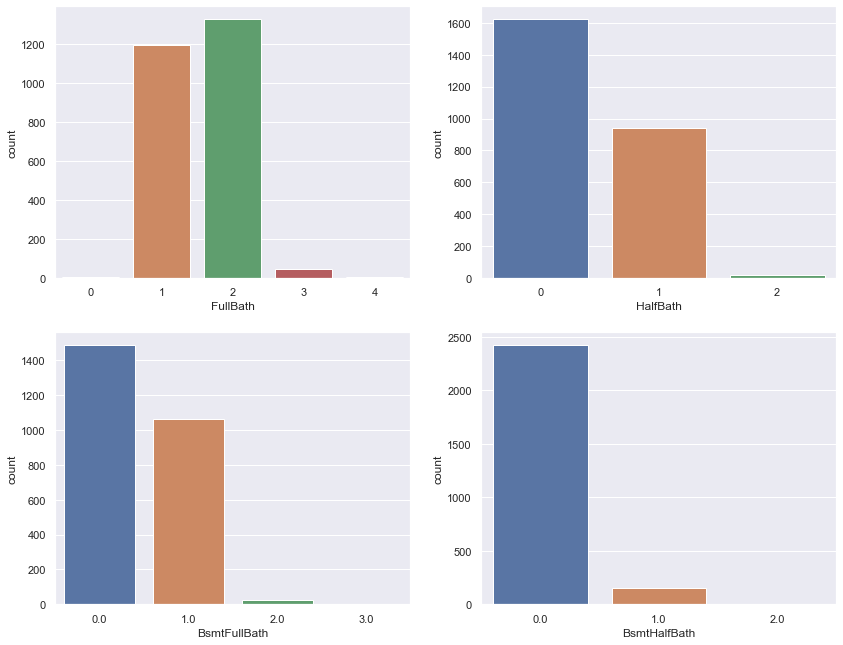

In [39]:
# Bsmt.Full.Bath - Basement full bathrooms.
# Bsmt.Half.Bath - Basement half bathrooms.
# Full.Bath - Full bathrooms above grade (above the ground).
# Half.Bath - Half baths above grade (above the ground).


bathrooms = ames_df[['FullBath', 'HalfBath','BsmtFullBath', 'BsmtHalfBath']].columns

plt.figure(figsize=(14, 11))

for i, col in enumerate(bathrooms):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=ames_df, x=col, ax=ax)

In [40]:
bath_related = ames_df[['FullBath', 'HalfBath','BsmtFullBath', 'BsmtHalfBath']]
bath_related.isnull().sum(axis=0)

FullBath        0
HalfBath        0
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [41]:
bath_related = bath_related.fillna(0.0)
bath_related.isnull().sum(axis=0)

FullBath        0
HalfBath        0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [42]:
ames_df['AggrBath'] = bath_related['FullBath'] + bath_related['BsmtFullBath'] + (bath_related['HalfBath']*0.5) + (bath_related['BsmtHalfBath']*0.5)
ames_df[['FullBath', 'HalfBath','BsmtFullBath',  'BsmtHalfBath', 'AggrBath']]

,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,AggrBath
1,1,0,1.0,0.0,2.0
2,2,0,1.0,0.0,3.0
3,1,0,0.0,0.0,1.0
4,1,0,0.0,0.0,1.0
5,2,1,1.0,0.0,3.5
...,...,...,...,...,...
759,1,0,0.0,0.0,1.0
760,2,0,0.0,0.0,2.0
761,2,0,0.0,0.0,2.0
762,2,1,1.0,0.0,3.5


[Text(0.5, 1.0, 'Aggregated Bath Boxplot')]

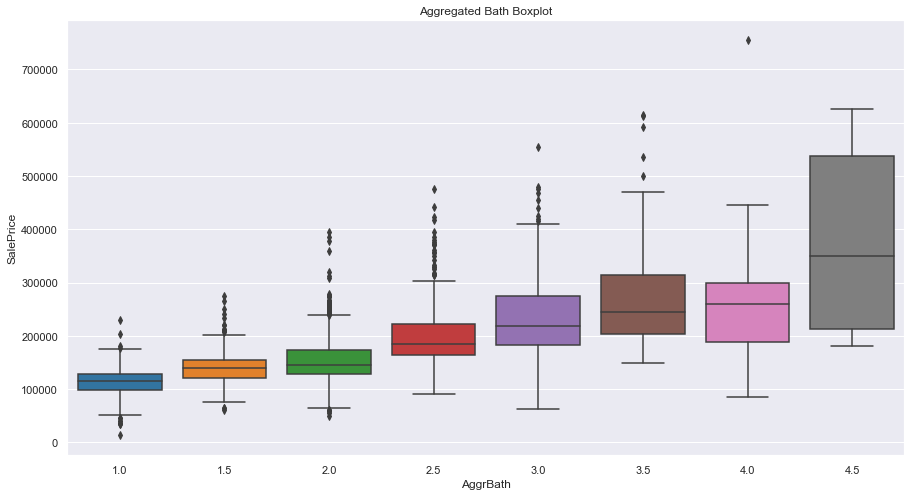

In [43]:
price = ames_df['SalePrice']
aggrbath = ames_df['AggrBath']

bath_less_than_5 = ames_df.loc[ames_df['AggrBath'] < 5]

sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='AggrBath', 
            y='SalePrice', 
            data=bath_less_than_5, 
            palette = 'tab10').set(title = "Aggregated Bath Boxplot")

### This makes sense as more bath rooms will correlate with larger home

[Text(0.5, 1.0, 'Aggregated Bathroom Count')]

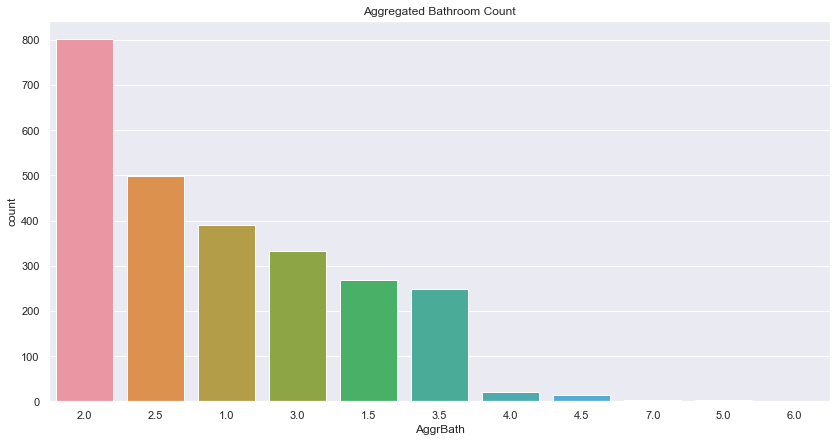

In [44]:
sns.set(rc = {'figure.figsize':(14,7)})
sns.countplot(data=ames_df, 
              x = 'AggrBath', 
              order=ames_df['AggrBath'].value_counts().index).set(title = "Aggregated Bathroom Count")

In [45]:
ames_df.AggrBath.value_counts()

2.0    802
2.5    499
1.0    389
3.0    332
1.5    269
3.5    249
4.0     21
4.5     13
7.0      3
5.0      2
6.0      1
Name: AggrBath, dtype: int64

In [46]:
ames_df.AggrBath.corr(ames_df['SalePrice'])

0.6399876776865676

Text(0.5, 1.0, 'Correlation with SalePrice: 0.6400')

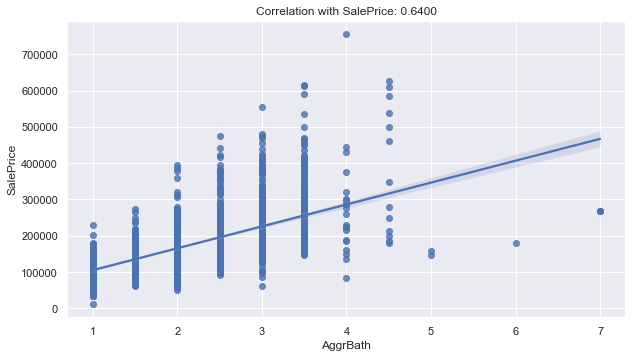

In [47]:
price = ames_df['SalePrice']
aggr_bath = ames_df['AggrBath']

fig = plt.figure(figsize=(22, 12))
fig1 = fig.add_subplot(221); sns.regplot(x='AggrBath', y='SalePrice', data=ames_df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(ames_df.AggrBath.corr(ames_df['SalePrice'])))

In [48]:
lm = LinearRegression()
lm.fit(aggr_bath.values.reshape(-1,1), price)
lm.score(aggr_bath.values.reshape(-1,1), price)

0.4095842275906457

In [49]:
print(lm.coef_)
print(lm.intercept_)

[60249.49054947]
45160.456311224145


In [50]:
lm.fit(np.log10(aggr_bath.values.reshape(-1,1)), np.log10(price))
lm.score(np.log10(aggr_bath.values.reshape(-1,1)), np.log10(price))

0.44532975721540324

##### **How much premium were the Ames home buyers (back in 2006−2010) willing to pay for a swimming-pool, an open deck, or an enclosed porch? Did the home buyers value the optional additions based on their sizes?**

In [51]:
np.sort(ames_df["YrSold"].unique())

array([2006, 2007, 2008, 2009, 2010])

In [52]:
addition_features = ames_df[['WoodDeckSF', 
                             'OpenPorchSF', 
                             'EnclosedPorch', 
                             '3SsnPorch', 
                             'ScreenPorch', 
                             'PoolArea', 
                             'PoolQC']]

In [53]:
addition_features.PoolQC.value_counts()

TA    3
Ex    2
Gd    2
Fa    2
Name: PoolQC, dtype: int64

In [54]:
addition_features.PoolQC = LabelEncoder().fit_transform(addition_features.PoolQC)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
print(addition_features.isnull().sum())


WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
dtype: int64


In [56]:
features_train, features_test, Y_train, Y_test = train_test_split(addition_features, price, test_size=0.2)

In [57]:
lm.fit(features_train, Y_train)
lm.score(features_train, Y_train)

0.23692904885112986

In [58]:
lm.fit(features_test, Y_test)
lm.score(features_test, Y_test)

0.21900714887194095

In [59]:
lm.fit(addition_features, price)
lm.score(addition_features, price)

0.22997394089282575

In [60]:
print('The intercept is ', lm.intercept_)
pd.Series(lm.coef_, index=addition_features.columns)

The intercept is  438362.83539787156


WoodDeckSF         188.980433
OpenPorchSF        330.139915
EnclosedPorch      -70.493143
3SsnPorch          123.268138
ScreenPorch        153.472409
PoolArea          -298.641600
PoolQC          -73726.982947
dtype: float64

##### **How important is a garage in adding value to the houses? How about the differences between an attached vs. detached garage?**

In [61]:
ames_df.filter(regex='Garage')

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1,Detchd,1939.0,Unf,2.0,399.0,TA,TA
2,Attchd,1984.0,Fin,1.0,266.0,TA,TA
3,Detchd,1930.0,Unf,1.0,216.0,TA,Po
4,Detchd,1940.0,Unf,1.0,281.0,TA,TA
5,Attchd,2001.0,Fin,2.0,528.0,TA,TA
...,...,...,...,...,...,...,...
759,Detchd,1916.0,Unf,1.0,192.0,Fa,Po
760,Attchd,1955.0,Unf,2.0,452.0,TA,TA
761,2Types,1949.0,Unf,3.0,871.0,TA,TA
762,Attchd,2000.0,Fin,2.0,486.0,TA,TA


In [62]:
ames_df.GarageCars.value_counts()

2.0    1439
1.0     713
3.0     285
0.0     127
4.0      14
5.0       1
Name: GarageCars, dtype: int64

[Text(0.5, 1.0, 'House Price by Garage Type')]

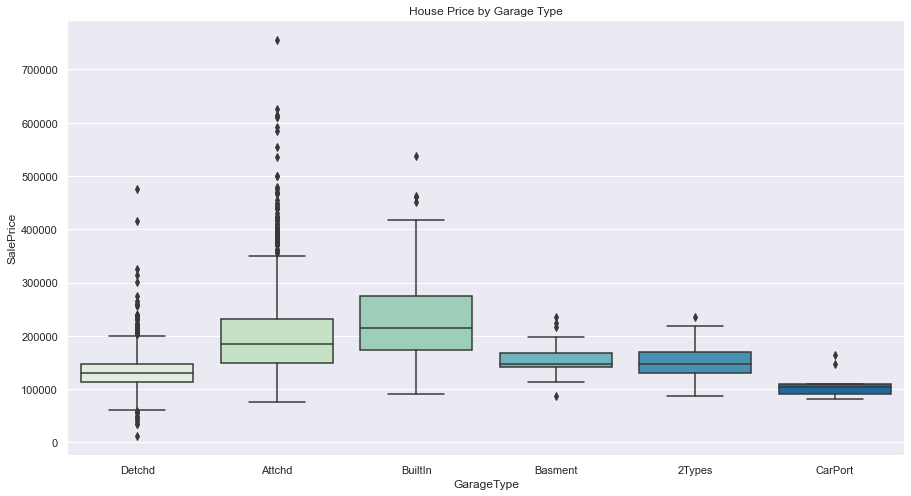

In [63]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='GarageType', 
            y='SalePrice', 
            data=ames_df, palette='GnBu').set(title = "House Price by Garage Type")

[Text(0.5, 1.0, 'House Price by Garage Size')]

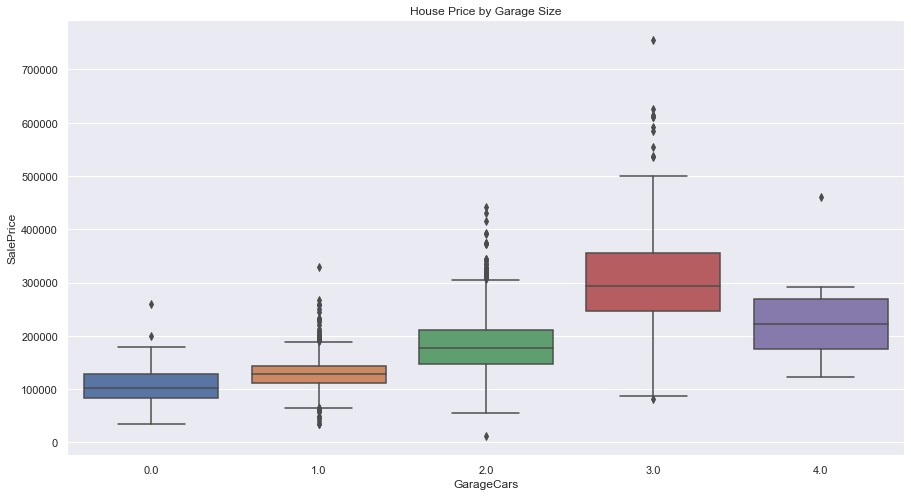

In [64]:
sns.set(rc = {'figure.figsize':(15,8)})

garage_less_than_5cars = ames_df.loc[ames_df['GarageCars'] < 5]

sns.boxplot(x='GarageCars', y='SalePrice', data=garage_less_than_5cars).set(title = "House Price by Garage Size")

In [65]:
ames_df.GarageCars.value_counts()

2.0    1439
1.0     713
3.0     285
0.0     127
4.0      14
5.0       1
Name: GarageCars, dtype: int64

[Text(0.5, 1.0, 'Sale Price per Garage Area')]

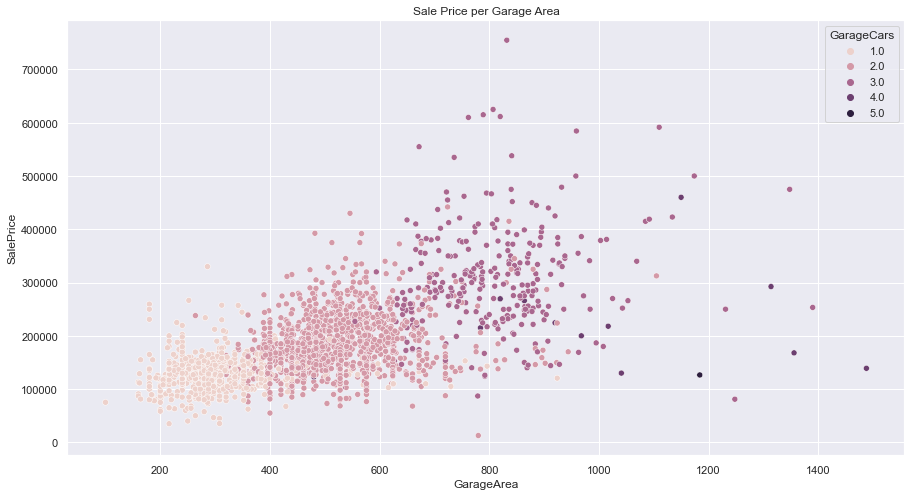

In [66]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = ames_df[ames_df['GarageArea']!= 0], 
                x = 'GarageArea',  
                y = 'SalePrice', 
                hue = 'GarageCars').set(title = "Sale Price per Garage Area")

### Why the larger and high number of garage homes have lower sales price

In [67]:
filter_garages = ames_df["GarageArea"] > 0
print("Average with-Garage Price:    $", round(price[filter_garages].mean()))
print("Average without-Garage Price: $", round(price[np.invert(filter_garages)].mean()))

Average with-Garage Price:    $ 181800
Average without-Garage Price: $ 106399


In [68]:
print("Average with-Attached Garage Price:")
print("$", round(price[ames_df["GarageType"] == "Attchd"].mean()))
print("Average without-Detached Garage Price:")
print("$", round(price[ames_df["GarageType"] == "Detchd"].mean()))

Average with-Attached Garage Price:
$ 200662
Average without-Detached Garage Price:
$ 133292


#####**Are there feature combinations which increase the house values? What are the feature combinations which drive the house values down (making the house less desriable)?**

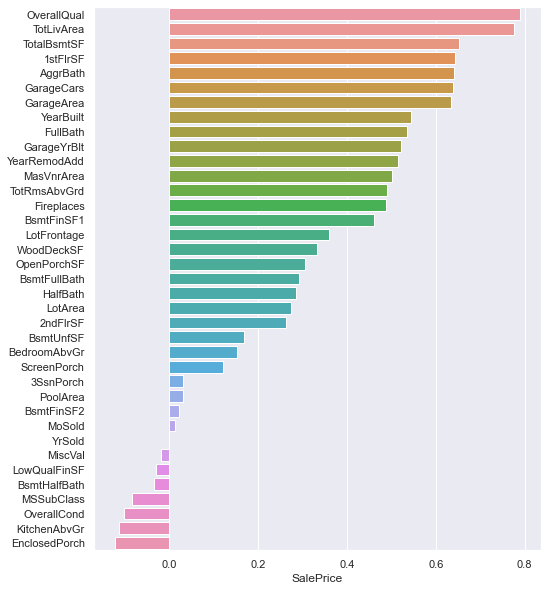

Bar Chart


In [69]:
def get_feature_groups():
    num_features = ames_df.select_dtypes(include=['int64','float64']).columns
    return list(num_features.drop(['PID','SalePrice']))

num_features = get_feature_groups()

corr = ames_df[['SalePrice'] + num_features].corr()
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x=corr.SalePrice[1:], y=corr.index[1:], orient='h')
plt.show()

print("Bar Chart")

In [70]:
housing_numerical = ames_df.drop(['PID'], axis =1).select_dtypes(include = ('int64', 'float64'))
housing_numerical.columns

Index(['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'TotLivArea', 'AggrBath'],
      dtype='object')

In [71]:
housing_categorical = ames_df.select_dtypes(include='object')
housing_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [72]:
housing_numerical.isnull().sum(axis=0)
housing_numerical = housing_numerical.fillna(0.0)
housing_numerical.columns

Index(['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'TotLivArea', 'AggrBath'],
      dtype='object')

In [73]:
numerical_features = housing_numerical.drop(['SalePrice'], axis =1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(numerical_features, price, test_size=0.25, random_state=12)

In [75]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
rf.feature_importances_

array([2.40921895e-03, 6.86632961e-03, 1.57501264e-02, 4.67246713e-01,
       4.81090748e-03, 2.73630279e-02, 1.04034654e-02, 7.48369821e-03,
       4.71026009e-03, 7.53159916e-04, 1.08694885e-02, 1.71750957e-02,
       1.86220504e-02, 9.47148981e-03, 1.26851183e-04, 8.55020571e-04,
       1.89849266e-04, 3.64581636e-03, 1.00371714e-03, 1.41738348e-03,
       2.15425181e-04, 3.45137524e-03, 5.01614667e-03, 6.38617536e-03,
       7.28496735e-03, 1.94902477e-02, 4.21019595e-03, 5.77751564e-03,
       1.11125982e-03, 4.17251071e-04, 3.34930832e-03, 1.43631798e-05,
       8.46565412e-05, 3.99989090e-03, 2.00596662e-03, 2.45650192e-01,
       8.03613937e-02])

Text(0.5, 0, 'Random Forest Feature Importance')

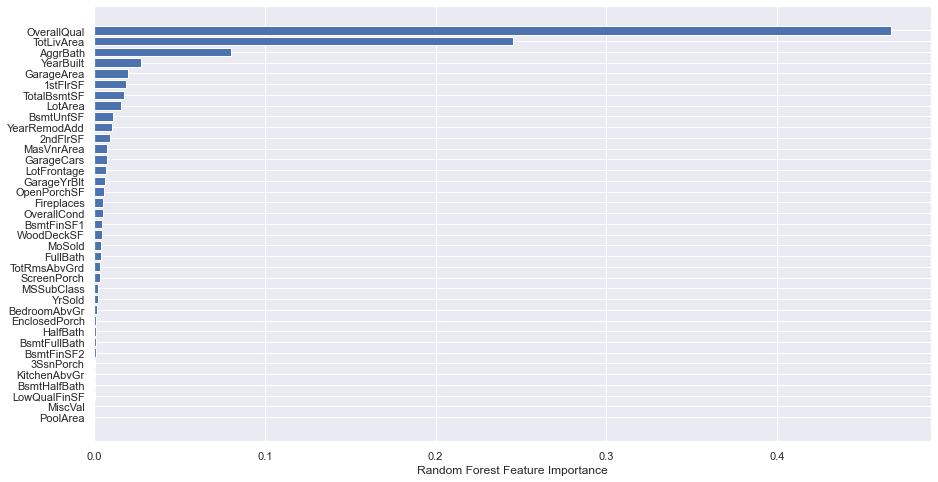

In [77]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(numerical_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [78]:
housing_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,Po,N,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,...,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [79]:
housing_categorical_encoded = housing_categorical.apply(LabelEncoder().fit_transform)
housing_categorical_encoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,5,1,2,3,3,0,0,0,21,2,...,5,2,4,4,2,4,4,4,9,4
2,5,1,2,3,3,0,4,0,7,2,...,1,0,4,4,2,4,4,4,9,4
3,1,1,2,3,3,0,4,0,11,2,...,5,2,4,3,0,4,4,4,9,4
4,5,1,2,3,3,0,0,0,20,2,...,5,2,4,4,0,4,4,4,9,4
5,5,1,2,3,3,0,4,0,17,2,...,1,0,4,4,2,4,4,4,9,4


In [80]:
X_train, X_test, y_train, y_test = train_test_split(housing_categorical_encoded, 
                                                    price, 
                                                    test_size=0.25, random_state=12)

In [81]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
rf.feature_importances_

array([8.68984360e-03, 1.12452692e-04, 1.56830586e-03, 8.11978259e-03,
       7.25872039e-03, 3.89734360e-06, 7.10048819e-03, 6.85633876e-03,
       5.95801675e-02, 6.51899752e-03, 2.35841526e-03, 1.34685804e-02,
       1.74645382e-02, 7.49795027e-03, 1.27863805e-02, 1.47872191e-02,
       1.41436720e-02, 1.10388229e-02, 3.27199514e-01, 9.23020864e-03,
       8.76103062e-03, 1.64364934e-01, 3.38245363e-03, 1.93555036e-02,
       1.18425348e-02, 5.66692748e-03, 1.59787409e-03, 7.96829528e-03,
       7.64542480e-03, 1.77309971e-03, 5.86989288e-02, 1.98104616e-03,
       8.59568772e-02, 4.13284977e-02, 1.39538491e-02, 5.52357578e-03,
       1.60011362e-03, 2.67324930e-03, 3.14687995e-03, 4.54281031e-03,
       7.06620828e-04, 3.99433292e-03, 7.75084492e-03])

Text(0.5, 0, 'Random Forest Feature Importance')

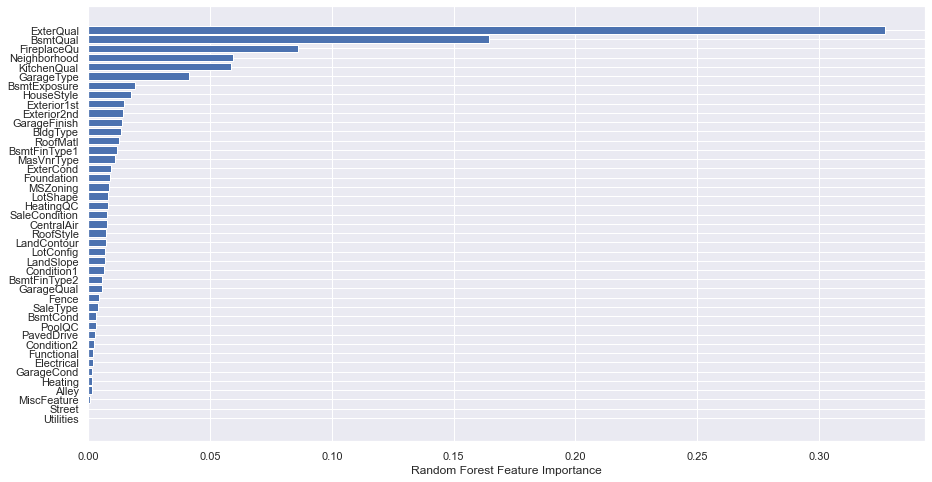

In [83]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(housing_categorical_encoded.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#####**House Quality/Condition: The Ames dataset grades each house by the appearance, kitchen, basement, garage, heating, fireplace, .... and finally an overall quality/condition.**

###### **a. How are the overall quality/condition features engineered from the individual quality/condition metrics?**

In [84]:
quality_related = ames_df.filter(regex="SalePrice|Condition|Cond$|Qual$|QC$")
quality_related.OverallQual.value_counts()

5     753
6     669
7     525
8     290
4     195
9      80
3      32
10     20
2      13
1       3
Name: OverallQual, dtype: int64

[Text(0.5, 1.0, 'House Overall Quality Boxplot')]

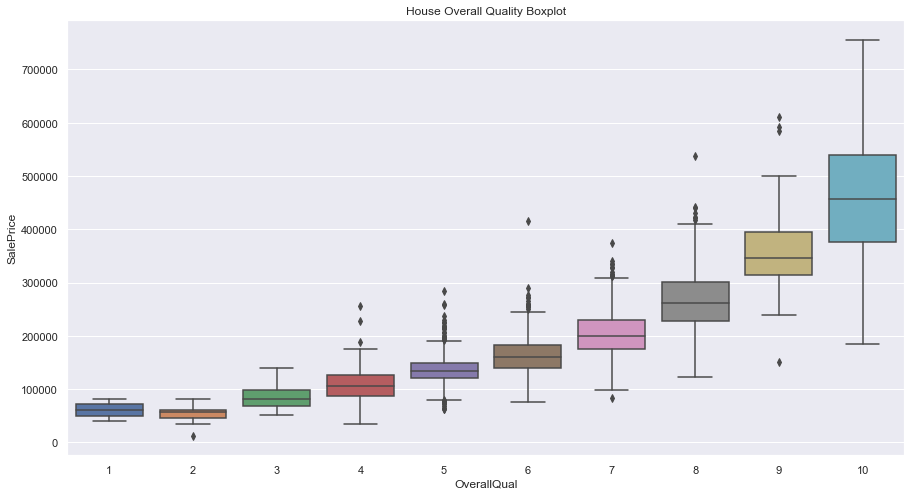

In [85]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='OverallQual', 
            y='SalePrice', 
            data=quality_related).set(title = "House Overall Quality Boxplot")

[Text(0.5, 1.0, 'Overall Quality Count')]

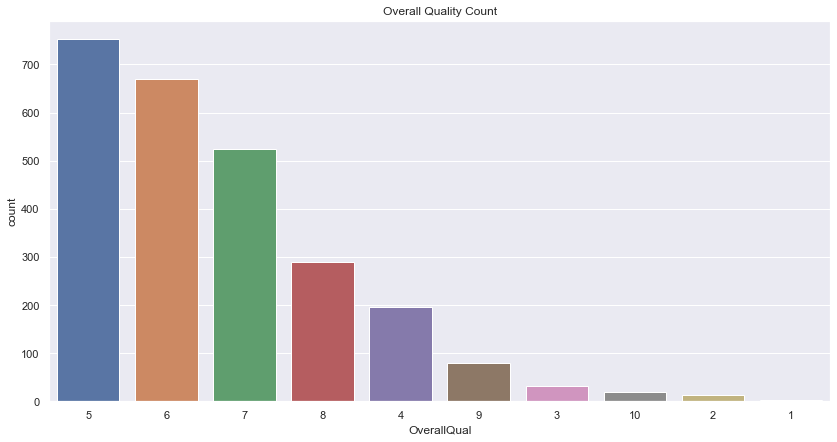

In [86]:
sns.set(rc = {'figure.figsize':(14,7)})
sns.countplot(data=quality_related, 
              x = 'OverallQual', 
              order=ames_df['OverallQual'].value_counts().index).set(title = "Overall Quality Count")

###### **b. How do these metrics' importances affect local house prices?**

In [87]:
quality_related.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      2580 non-null   int64 
 1   Condition1     2580 non-null   object
 2   Condition2     2580 non-null   object
 3   OverallQual    2580 non-null   int64 
 4   OverallCond    2580 non-null   int64 
 5   ExterQual      2580 non-null   object
 6   ExterCond      2580 non-null   object
 7   BsmtQual       2511 non-null   object
 8   BsmtCond       2511 non-null   object
 9   HeatingQC      2580 non-null   object
 10  KitchenQual    2580 non-null   object
 11  GarageQual     2451 non-null   object
 12  GarageCond     2451 non-null   object
 13  PoolQC         9 non-null      object
 14  SaleCondition  2580 non-null   object
dtypes: int64(3), object(12)
memory usage: 322.5+ KB


In [88]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [89]:
quality_related = MultiColumnLabelEncoder(columns = ['Condition1', 'Condition2', 'ExterQual', 'ExterCond', 'BsmtQual',
                                   'BsmtCond', 'HeatingQC','KitchenQual',
                                   'GarageQual', 'GarageCond', 'PoolQC', 'SaleCondition']).fit_transform(quality_related)

In [90]:
quality_related.isnull().sum(axis=0)

SalePrice        0
Condition1       0
Condition2       0
OverallQual      0
OverallCond      0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
HeatingQC        0
KitchenQual      0
GarageQual       0
GarageCond       0
PoolQC           0
SaleCondition    0
dtype: int64

In [91]:
x = quality_related.drop('SalePrice', axis = 1)
y = quality_related['SalePrice']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1728, 14)
(852, 14)
(1728,)
(852,)


In [93]:
# Ridge regression

rr = Ridge(alpha=1) 
rr.fit(x_train,y_train)
y_pred_train = rr.predict(x_train) 
y_pred = rr.predict(x_test) 

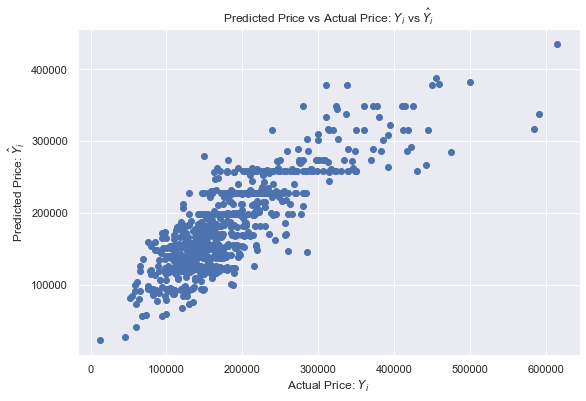

In [94]:
plt.figure(figsize=(9, 6))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
mse = round(mean_squared_error(y_test,y_pred))
print('Mean Squared Error: ',mse)
rsq = round(r2_score(y_train,y_pred_train), 2)
print('R-square, Training: ',rsq)
rsq = round(r2_score(y_test,y_pred), 2)
print('R-square, Testing: ',rsq)

Mean Squared Error:  1713689436
R-square, Training:  0.67
R-square, Testing:  0.71


In [97]:
print('Intercept: ',rr.intercept_) 
print('Coefficients: \n',rr.coef_) 

Intercept:  84310.10889170115
Coefficients: 
 [   467.73614565   5110.58068773  30268.80156499   1628.24329792
 -16112.1177706     -67.71121723  -7369.8695437    2948.28094885
   -721.7154577   -6298.98567244    966.96856619   -223.20707066
 -14230.31004035   3679.95299732]


In [98]:
print('The intercept is %.4f' %(rr.intercept_))
coefDF = pd.Series(rr.coef_, index=x.columns)
print('The slopes are \n %s' %(coefDF.sort_values(ascending=False)))

The intercept is 84310.1089
The slopes are 
 OverallQual      30268.801565
Condition2        5110.580688
SaleCondition     3679.952997
BsmtCond          2948.280949
OverallCond       1628.243298
GarageQual         966.968566
Condition1         467.736146
ExterCond          -67.711217
GarageCond        -223.207071
HeatingQC         -721.715458
KitchenQual      -6298.985672
BsmtQual         -7369.869544
PoolQC          -14230.310040
ExterQual       -16112.117771
dtype: float64


###### **c. To what extent does the curb appeal affect the house prices?**

In [99]:
curb_appeal = ames_df[['ExterQual', 'ExterCond', 'PavedDrive']]

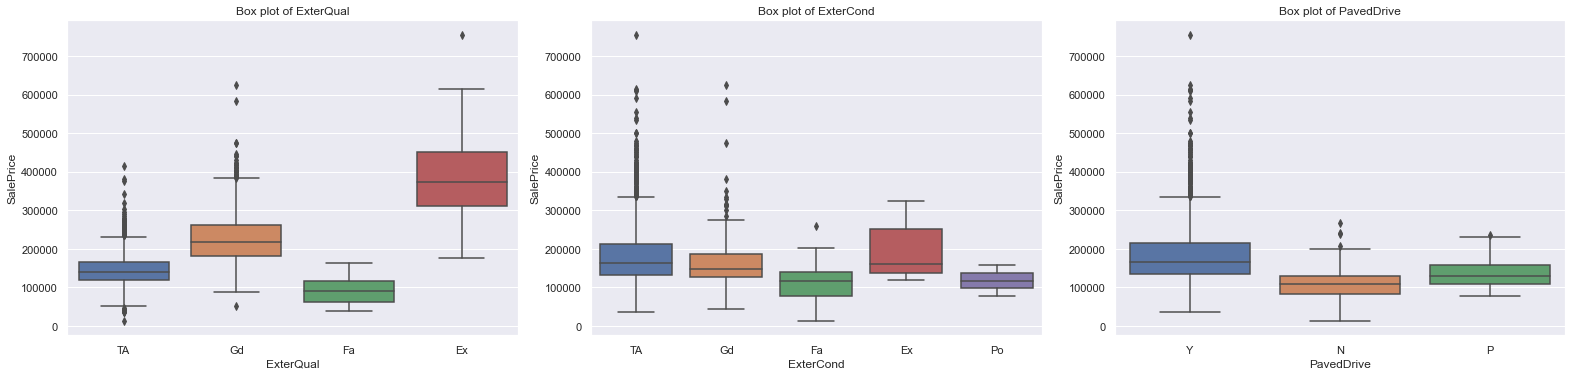

In [100]:
fig = plt.figure(figsize=(22,25), facecolor='white')
for i, v in enumerate(curb_appeal):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=v, y='SalePrice', data=ames_df)
    plt.title('Box plot of {}'.format(v))   
plt.tight_layout()

In [101]:
curb_appeal = curb_appeal.apply(LabelEncoder().fit_transform)

In [102]:
curb_appeal_train, curb_appeal_test, Y_train, Y_test = train_test_split(curb_appeal, price, test_size=0.2)

In [103]:
lm.fit(curb_appeal_train, Y_train)
lm.score(curb_appeal_train, Y_train)

0.4338693548840076

In [104]:
lm.fit(curb_appeal_test, Y_test)
lm.score(curb_appeal_test, Y_test)

0.5175371660182773

In [105]:
lm.fit(curb_appeal, price)
lm.score(curb_appeal, price)

0.44779944300647356

In [106]:
print('The intercept is ', lm.intercept_)
pd.Series(lm.coef_, index=curb_appeal.columns)

The intercept is  277157.7678119902


ExterQual    -69194.017827
ExterCond      6859.702694
PavedDrive    28929.573909
dtype: float64

##### **Does home remodeling add value to the houses? For example, how do the old houses which were remodeled in the 1990s compare to the houses which were built in the 1990s?**

In [107]:
same_1990s = (ames_df["YearBuilt"] < 1990) & (ames_df["YearRemodAdd"] == ames_df["YearBuilt"])
remodelled_1990s = (ames_df["YearBuilt"] < 1990) & (ames_df["YearRemodAdd"] >= 1990) & (ames_df["YearRemodAdd"] < 2000)
built_1990s = (ames_df["YearBuilt"] >= 1990) & (ames_df["YearBuilt"] < 2000)

In [108]:
print("Houses that are not remodeled:", np.sum(same_1990s))
print("Houses that are remodeled:", np.sum(remodelled_1990s))
print("Houses built after 1990:", np.sum(built_1990s))

Houses that are not remodeled: 810
Houses that are remodeled: 181
Houses built after 1990: 324


Histogram


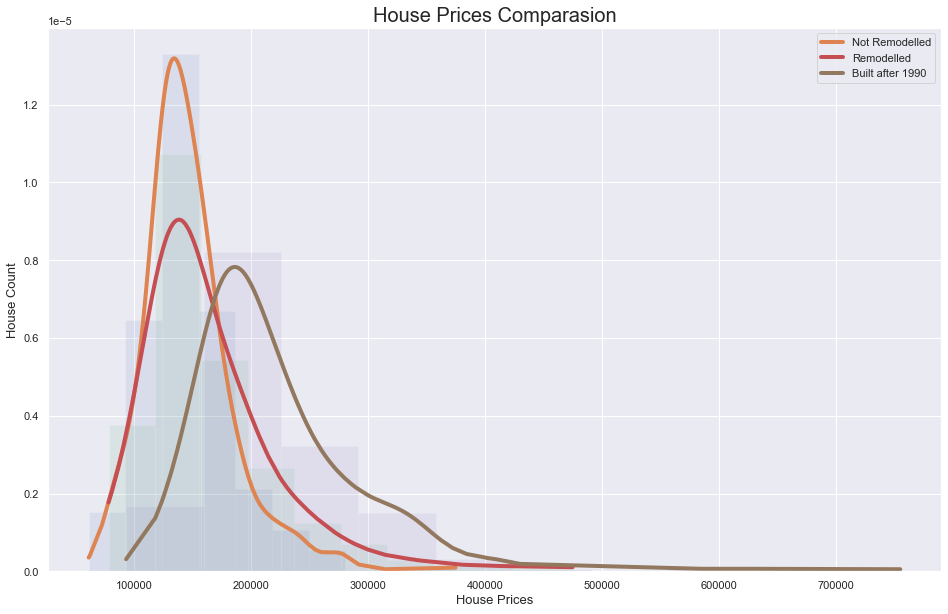

In [109]:
plt.figure(figsize=(16, 10))

for f, label in ((same_1990s, "Not Remodelled"),
                 (remodelled_1990s, "Remodelled"),
                 (built_1990s, "Built after 1990")):
  x = np.sort(price[f])
  plt.hist(x, density=True, alpha=0.1)
  density = stats.gaussian_kde(x)
  plt.plot(x, density(x), linewidth=4, label=label)

plt.xlabel("House Prices", fontsize=13)
plt.ylabel("House Count", fontsize=13)
plt.legend()
plt.title("House Prices Comparasion", fontsize=20)

print("Histogram")

In [110]:
print('End of Notebook')

End of Notebook
